# Bonusleistung Paket 4 Teil 1 
### Aus der Schulung Logistische Regressionsanalyse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Für diese Schulung habe ich ein Dataset ausgewählt, das Daten über Werbeanzeigen auf Sozialen Netzwerken beinhaltet. Dieses entsprach den Anforderungen am besten.

### Dataset einlesen und Überblick über die Daten verschaffen


In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.isnull().all()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

Auf den ersten Blick sehen die Daten gut aus, um mit ihnen ein Modell zu trainieren. Es gibt keine Null-Werte und auch keine Ausreißer (Min/Max bei Alter: 18/60, Min/Max bei Salary: 15000/150000 sieht plausibel aus).    

## Datenbereinigung und Transformation

In [8]:
dfPrepared = df.copy()

##### Die Spalte User ID wird nicht benötigt und kann entfernt werden.

In [10]:
dfPrepared.drop('User ID', axis=1, inplace=True)

##### One Hot encoding für kategorische Variablen (Gender)

In [11]:
df_OneHot = dfPrepared.copy()
df_OneHot = pd.get_dummies(dfPrepared, prefix = '', prefix_sep = '')
df_OneHot

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [12]:
dfPrepared = df_OneHot.copy()

## Datensatz in Test- & Trainingdatensatz aufteilen
##### Zielvariable bestimmen

In [14]:
# Import the library
from sklearn.model_selection import train_test_split

x = dfPrepared.drop('Purchased', axis = 1)
y = dfPrepared['Purchased']

Da die Daten am Ende (mal wieder) zu einer sehr schlechten Vorhersage geführt haben versuche ich hier einmal einen Scaler anzuwenden, um ein besseres Ergebnis zu bekommen

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d_scaled = scaler.fit_transform(x)
data_scaled1 = pd.DataFrame(d_scaled)
data_scaled1.head()

,0,1,2,3
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


##### Datensätze aufteilen (70/30)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(d_scaled, y, random_state = 101, stratify = y, test_size = 0.3)

# Anpassen der Logistischen Regression an das Trainingset

### Erstellung & Trainieren des Modells

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr_model = LogisticRegression(random_state=25)

In [47]:
lr_model.fit(x_train, y_train)

LogisticRegression(random_state=25)

**Anmerkung: Theoretisch wäre hier auch eine Hyperparameteroptimierung mit Gridsearch möglich.**

### Sigmoide Kurve
führen Sie das Code durch um die Sigmoide Kurve zeichnen zu lassen

([<matplotlib.axis.YTick at 0x7f82422e8040>,
 [Text(0, 0, 'Nicht gekauft'), Text(0, 1, 'Gekauft')])

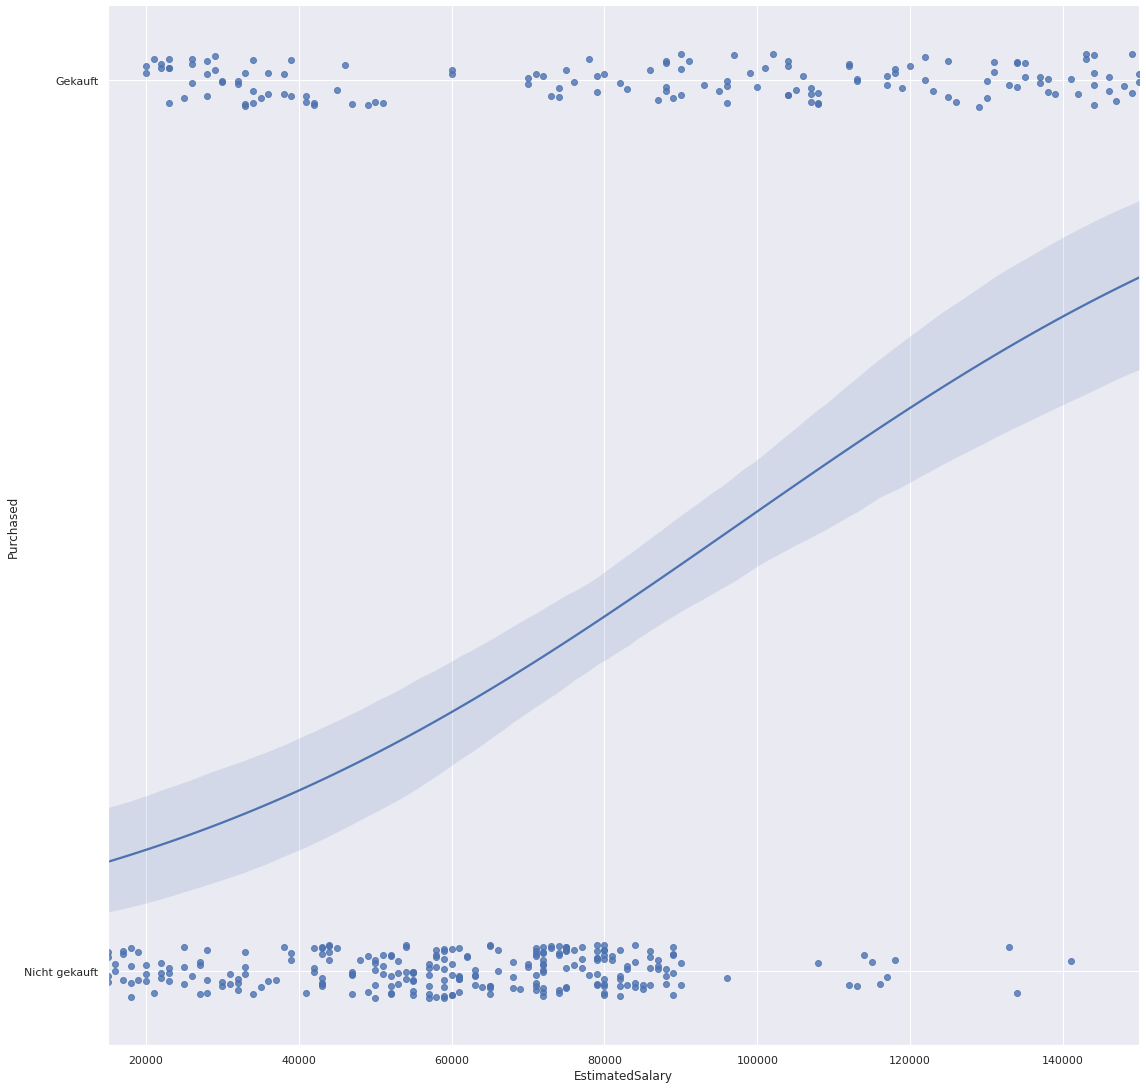

In [96]:
#use seaborn.lmplot to graph the logistic regression function
data = df
data1 = df.copy()
sns.lmplot(x="EstimatedSalary", y="Purchased", data=dfPrepared,
           logistic=True, y_jitter=.03, height=15, aspect=1)
plt.yticks([0, 1], ['Nicht gekauft', 'Gekauft'])

## Vorhersage des Testergebnisses & Modellevaluation

In [48]:
pred = lr_model.predict(x_test)

In [49]:
pred[0:9]

array([1, 0, 0, 0, 0, 0, 0, 0, 1])

Vorassage der Auftrittswahrscheinlichkeiten von 0 & 1

In [50]:
pred_prb = lr_model.predict_proba(x_test)

In [51]:
pred_prb[0:9, 0:9]

array([[0.02088276, 0.97911724],
       [0.64958167, 0.35041833],
       [0.93445451, 0.06554549],
       [0.99569691, 0.00430309],
       [0.99724571, 0.00275429],
       [0.91040951, 0.08959049],
       [0.94739868, 0.05260132],
       [0.78787939, 0.21212061],
       [0.01020309, 0.98979691]])

Erster Wert in Numpy Array ist Wahrscheinlichkeit von 0 und der zweite die Wahrscheinlichkeit von 1

Mit dem folgenden Code werden die Auftrittswahrscheinlichkeiten von 1 vorausgesagt und extrahiert

In [52]:
lr_pred_prb = lr_model.predict_proba(x_test)[:, 1]

## Vergleich der vorhandenen und vorhergesagten Daten

In [60]:
print(f'Testdaten Genauigkeit: {lr_model.score(x_test,y_test)}')
print(f'Trainingsdaten Genauigkeit: {lr_model.score(x_train,y_train)}')

Testdaten Genauigkeit: 0.8083333333333333
Trainingsdaten Genauigkeit: 0.8535714285714285


##### Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

##### Confusion Matrix:

In [32]:
confusion_matrix(y_test, pred).ravel()

array([77,  0, 43,  0])

In [72]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
conf_matrix = pd.DataFrame({"Kauf vorhergesagt": [tp, fp], "Kein Kauf vorhergesagt": [
                           fn, tn]}, index=["Gekauft", "Nicht gekauft"])
conf_matrix

,Kauf vorhergesagt,Kein Kauf vorhergesagt
Gekauft,23,20
Nicht gekauft,3,74


### Accuracy (Berechnungsgenauigkeit)

In [62]:
from sklearn.metrics import accuracy_score

#### Accuracy

In [67]:
accuracy_lr = accuracy_score(y_test, pred)
print("Accuracy: {}".format(accuracy_lr))

Accuracy: 0.8083333333333333


### Modellgenauigkeit

In [75]:
from sklearn.metrics import precision_score

In [76]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.8846153846153846
Precision for 0: 0.7872340425531915


In [78]:
precision_lr = precision_score(y_test, pred)
print("Precision: {}".format(precision_lr))

Precision: 0.8846153846153846


### Recall

In [79]:
from sklearn.metrics import recall_score

In [80]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.5348837209302325
Recall for 0: 0.961038961038961


In [83]:
recall_lr = recall_score(y_test, pred)
print("Recall: {}".format(recall_lr))

Recall: 0.5348837209302325


### F1 Score

In [84]:
from sklearn.metrics import f1_score

In [85]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.6666666666666665
F1 Score for 0: 0.8654970760233919


In [87]:
f1_lr = f1_score(y_test, pred)
print("F1 Score: {}".format(f1_lr))

F1 Score: 0.6666666666666665


### Classification Report

In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        77
           1       0.88      0.53      0.67        43

    accuracy                           0.81       120
   macro avg       0.84      0.75      0.77       120
weighted avg       0.82      0.81      0.79       120



# Fazit

Ich bin mit meinem selbst ausgewählten Dataset letzendlich auf eine akzeptable Vorhersage gekommen. Auch hier war, wie so oft, das schwierigste ein geeignetes Dataset zu finden.    
Tatsächlich bin ich hier anfangs auf Probleme gestoßen, weil das trainierte Modell mal wieder eine sehr schlechte Vorhersage durchgeführt hat. Außerdem hat das Modell nur "Nicht-Käufer" vorhergesagt womit es nicht zu gebrauchen war.    
Da ich kein neues Dataset heraussuchen wollte habe ich dann eine Normalisierung mithilfe des StandardScaler durchgeführt. Damit konnte ich die Vorhersage von unter 60% auf 80% steigern was zu einem akzeptablen Ergebnis der Vorhersage geführt hat. Theoretisch hätte ich mithilfe der Hyperparametisierung z.B. mit GridSearch die Parameter des Modells noch etwas optimieren können.      
    
Auch wenn vieles an der Schulung "Standard" war, fand ich die Auswertung der Genauigkeit anhand verschiedener Kennzahlen interessant, sowie die eigene Berechnung dieser Kennzahlen mit den Werten aus der Confusion Matrix